In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk as nl
from sklearn import naive_bayes
import seaborn as sns
from nltk.classify.scikitlearn import SklearnClassifier


nl.download('punkt')
nl.download('averaged_perceptron_tagger')
nl.download('cmudict')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sava\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Sava\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package cmudict to
[nltk_data]     C:\Users\Sava\AppData\Roaming\nltk_data...
[nltk_data]   Package cmudict is already up-to-date!


True

In [2]:
df = pd.read_csv('data\poems\haiku.csv')
df = df.tail(10000)

df = df[['0', '1', '2']]

# get the CMU Pronouncing Dictionary
transcr = nl.corpus.cmudict.dict()

# concatenate data of all columns into one column and word tokenize
df['0'] = df['0'].apply(lambda x: [w.lower() for w in nl.tokenize.word_tokenize(x) if w.isalpha()])
df['1'] = df['1'].apply(lambda x: [w.lower() for w in nl.tokenize.word_tokenize(x) if w.isalpha()])
df['2'] = df['2'].apply(lambda x: [w.lower() for w in nl.tokenize.word_tokenize(x) if w.isalpha()])

def get_syllables(word):
    if word in transcr:
        pron = transcr[word][0]

        # get the number of syllables in the word
        syllable_count = sum(y.isdigit() for x in pron for y in x)
        return syllable_count
    return 0

# check the amount of syllables in the sentence
for ind, row in df.iterrows():
    sentence_syl_count = sum(get_syllables(w) for w in row['0'])
    sentence_syl_count += sum(get_syllables(w) for w in row['1'])
    sentence_syl_count += sum(get_syllables(w) for w in row['2'])

    if(sentence_syl_count != 17):
        df = df.drop(ind)  # haiku must have 17 syllables

print(df.shape)

print(df.head())
# tag the tokenized sentences

df['joined_sents'] = df.apply(lambda x: [*x['0'], *x['1'], *x['2']], axis=1)
df['sent_len'] = df.apply(lambda x: [len(x['0']), len(x['1']), len(x['2'])], axis=1)


df['tagged_sents'] = df['joined_sents'].apply(lambda x: nl.pos_tag(x))

df.head(5)

(8472, 3)
                            0                                        1  \
134123   [i, have, a, really]        [cute, outfit, for, tonight, but]   
134124   [we, can, hold, our]      [hands, together, through, the, oh]   
134125   [you, my, hero, man]  [get, well, soon, i, loved, you, since]   
134126  [my, biggest, guilty]           [pleasure, is, probably, punk]   
134127  [yes, daddy, tie, me]    [up, choke, me, to, dead, and, leave]   

                                   2  
134123       [i, can, not, find, it]  
134124    [oh, through, the, oh, oh]  
134125  [here, in, the, real, world]  
134126      [covers, of, pop, songs]  
134127           [my, body, to, rot]  


,0,1,2,joined_sents,sent_len,tagged_sents
134123,"[i, have, a, really]","[cute, outfit, for, tonight, but]","[i, can, not, find, it]","[i, have, a, really, cute, outfit, for, tonigh...","[4, 5, 5]","[(i, NNS), (have, VBP), (a, DT), (really, RB),..."
134124,"[we, can, hold, our]","[hands, together, through, the, oh]","[oh, through, the, oh, oh]","[we, can, hold, our, hands, together, through,...","[4, 5, 5]","[(we, PRP), (can, MD), (hold, VB), (our, PRP$)..."
134125,"[you, my, hero, man]","[get, well, soon, i, loved, you, since]","[here, in, the, real, world]","[you, my, hero, man, get, well, soon, i, loved...","[4, 7, 5]","[(you, PRP), (my, PRP$), (hero, NN), (man, NN)..."
134126,"[my, biggest, guilty]","[pleasure, is, probably, punk]","[covers, of, pop, songs]","[my, biggest, guilty, pleasure, is, probably, ...","[3, 4, 4]","[(my, PRP$), (biggest, JJS), (guilty, JJ), (pl..."
134127,"[yes, daddy, tie, me]","[up, choke, me, to, dead, and, leave]","[my, body, to, rot]","[yes, daddy, tie, me, up, choke, me, to, dead,...","[4, 7, 4]","[(yes, RB), (daddy, JJ), (tie, NNS), (me, PRP)..."


Total amount of sample 108143
Total classes 9551
Index(['i', 'the', 'to', 'a', 'you', 'and', 'my', 'is', 'it', 'of', 'in', 'me',
       'for', 'do', 'that', 'this', 'so', 'be', 'on', 'just', 'with', 'but',
       'not', 'have', 'your', 'like', 'all', 'are', 'get', 'when', 'can', 'if',
       'people', 'what', 'up', 'out', 'was', 'at', 'really', 'they', 'love',
       'how', 'one', 'no', 'about', 'got', 'we', 'will', 'time', 'go'],
      dtype='object')


C:\Users\Sava\.virtualenvs\crea-2-w6Y9zmrs\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,0,1,2,joined_sents,sent_len,tagged_sents
134123,"[i, have, a, really]","[cute, outfit, for, tonight, but]","[i, can, not, find, it]",i,"[4, 5, 5]","[(i, NNS), (have, VBP), (a, DT), (really, RB),..."
134123,"[i, have, a, really]","[cute, outfit, for, tonight, but]","[i, can, not, find, it]",have,"[4, 5, 5]","[(i, NNS), (have, VBP), (a, DT), (really, RB),..."
134123,"[i, have, a, really]","[cute, outfit, for, tonight, but]","[i, can, not, find, it]",a,"[4, 5, 5]","[(i, NNS), (have, VBP), (a, DT), (really, RB),..."


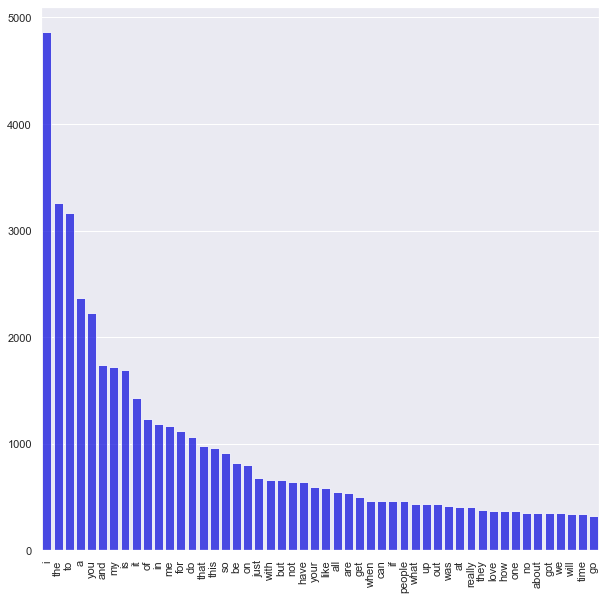

In [18]:
unit = df.explode('joined_sents')

print('Total amount of sample', unit['joined_sents'].count())
print('Total classes', unit['joined_sents'].nunique())


sns.set_theme()
# create new figure
fig, ax = plt.subplots(figsize=(10, 10))

# get the amount of words in each class
data = unit['joined_sents'].value_counts()[:50]

print(data.index)

plt.xticks(rotation=90)
sns.barplot(data.index, data.values, alpha=0.8, color='blue', ax=ax)

unit.head(3)

In [46]:
def pos_features(sentence, i):
    word = sentence[i][0]
    tag = sentence[i][1]

    features = {
        "bias": 1.0,
        "suffix(1)": word[-1:],
        "suffix(2)": word[-2:],
        "suffix(3)": word[-3:],
        "word":word,
        "pos": tag
    }

    # count number of current word in sentence
    features["count"] = sentence.count(word)

    features.update(get_n_word(sentence, i, -1))
    # features.update(get_n_word(sentence, i, -2))

    return features


def get_n_word(sentence, i, n):
    if i + n < 0:
        return {
            "SOS": True
        }
    return {
        f'{n}:word': sentence[i + n][0],
        f'{n}:word:pos': sentence[i + n][1],
    }


def get_next_word(sentence, i):
    if i + 1 >= len(sentence):
        return "<END>"
    return sentence[i+1]


featuresets = []
for ind, row in df.iterrows():
    featuresets.append([])
    for i, (word, tag) in list(enumerate(row['tagged_sents']))[:-1]:
        featuresets[-1].append((pos_features(row['tagged_sents'], i), get_next_word(row['joined_sents'], i)))
    
    featuresets[-1].append((pos_features(['SOS'], 0), row['joined_sents'][0]))
    

size = int(len(featuresets) * 0.1)


def flatten(t):
    return [item for sublist in t for item in sublist]


f_f = flatten(featuresets)

train_set, test_set = f_f[size:], f_f[:size]


In [43]:
classifier = nl.NaiveBayesClassifier.train(train_set)

In [27]:
# classifier2 = SklearnClassifier(naive_bayes.MultinomialNB()).train(train_set)

In [45]:
import random

sample = random.choice(train_set)
print(sample)

prev_word = sample[0]['word']
postag = nl.tag.pos_tag([prev_word])[0][1]
poem = [(prev_word, postag)]

i = 0
while i < 10:
    vector = pos_features(poem, i)
    prev_word =  classifier.prob_classify(vector).generate()
    postag = nl.tag.pos_tag([prev_word])[0][1]
    poem.append((prev_word, postag))
    i += 1

poem

({'bias': 1.0, 'suffix(1)': 't', 'suffix(2)': 'st', 'suffix(3)': 'est', 'word': 'best', 'pos': 'JJS', 'count': 0, '-1:word': 'your', '-1:word:pos': 'PRP$'}, 'friend')


[('best', 'JJS'),
 ('thing', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('world', 'NN'),
 ('have', 'VB'),
 ('to', 'TO'),
 ('be', 'VB'),
 ('a', 'DT'),
 ('good', 'JJ'),
 ('thing', 'NN')]

In [11]:
nl.classify.accuracy(classifier2, test_set)


0.1192443919716647

In [55]:
classifier.prob_classify(f_f[0][0]).generate()

'ca'